<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:40px 20px;"><b>Simple Linear Regression</b></p>

# <font color='orange'> <b>Importing Libraries</b><font color='black'>  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# <font color='orange'> <b>Loading Dataset & EDA</b><font color='black'>  

In [5]:
df = pd.read_csv("Advertising.csv")
df.sample(10)

,TV,radio,newspaper,sales
185,205.0,45.1,19.6,22.6
112,175.7,15.4,2.4,14.1
196,94.2,4.9,8.1,9.7
175,276.9,48.9,41.8,27.0
27,240.1,16.7,22.9,15.9
56,7.3,28.1,41.4,5.5
86,76.3,27.5,16.0,12.0
84,213.5,43.0,33.8,21.7
65,69.0,9.3,0.9,9.3
7,120.2,19.6,11.6,13.2


independent variables = feature = estimator = attribute = input

dependent variables = target = label = output

rows: observation - samples

**Features:** TV - radio - newspaper

**Target :** Sales

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
# because we will learn and examine Simple linear regression in this notebook //
# // there must be only one feature and one target variable (one X and one y)

# total_spend = Let the new feature name representing Total Spend (TV + Radio + newspaper)

df["total_spend"] = df.TV + df.radio + df.newspaper
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [10]:
df = df.iloc[:, [0,1,2,4,3]]  # To see the sales value (target variable) at the end in df
df.head()

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


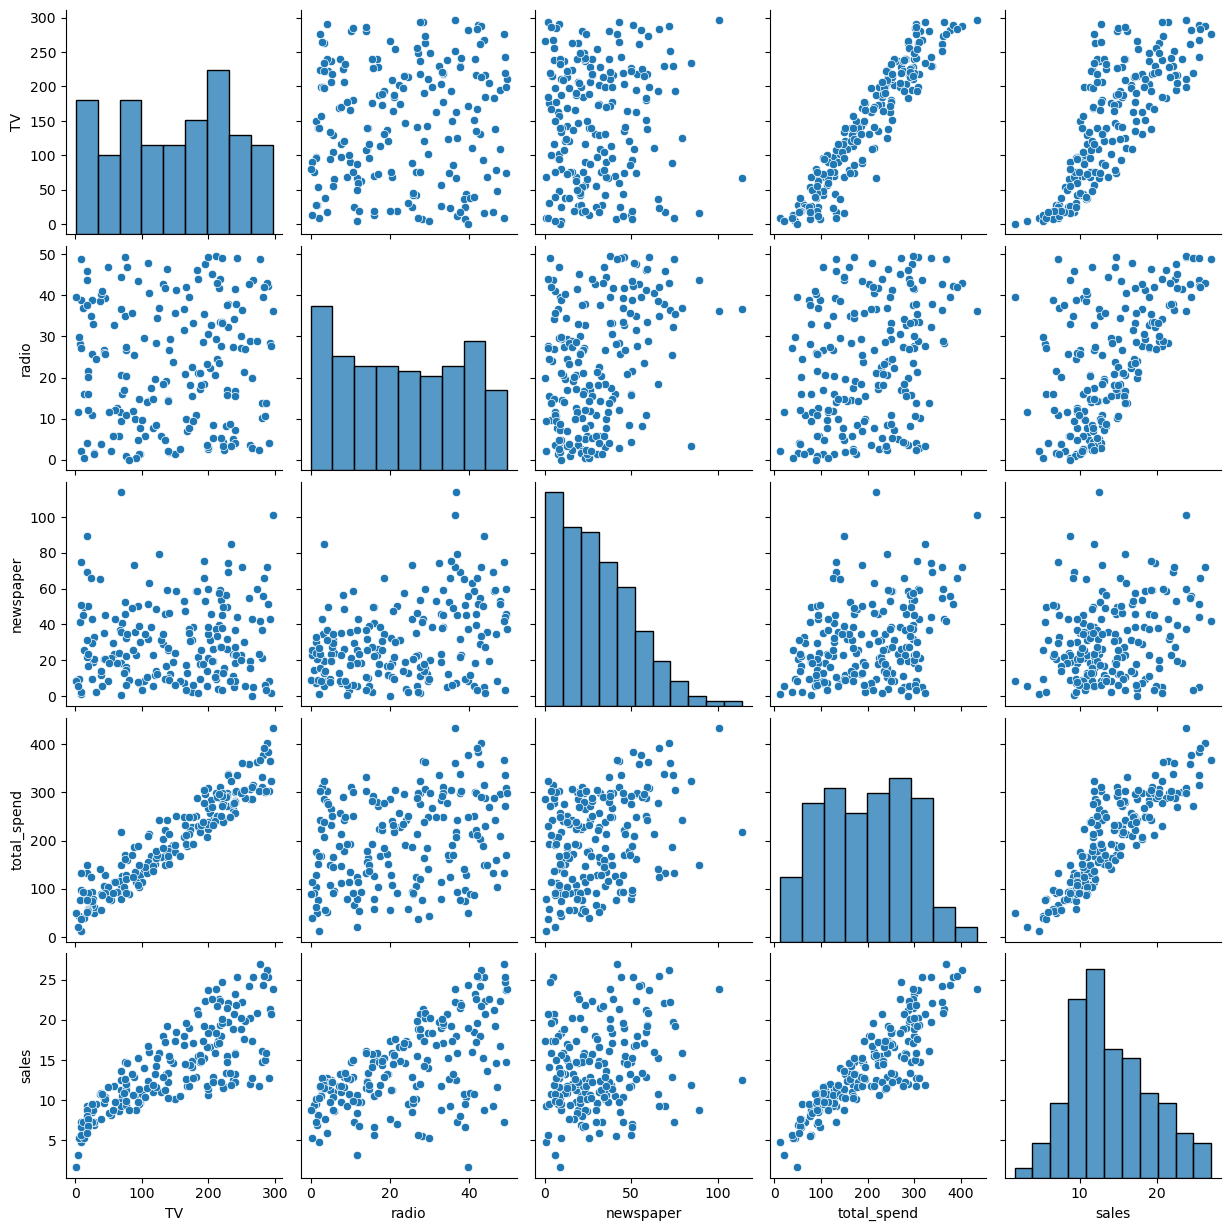

In [11]:
sns.pairplot(df);

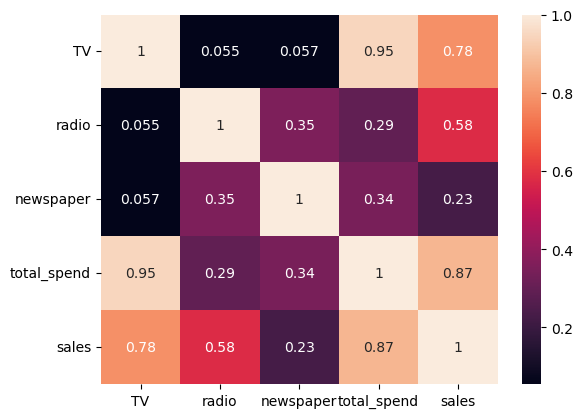

In [12]:
sns.heatmap(df.corr(), annot=True);

**It is desired that the correlation of the features be low among themselves and very high with the target variable.**

In [14]:
# For Simple linear regression model, let's create a new Data Frame according to the total_spend feature.//
# // let there be a single X and a single y..

df = df[["total_spend", "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


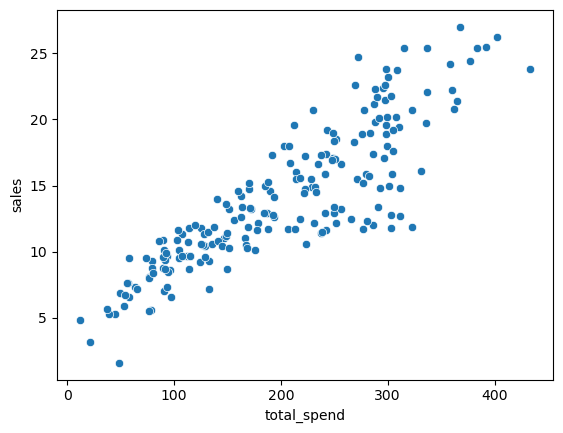

In [15]:
sns.scatterplot(x="total_spend", y = "sales", data =df);

In [16]:
corr = df.sales.corr(df.total_spend)  # Equating the correlation between sales and total_spend to a variable
corr

0.8677123027017427

In [17]:
# This method shown is a method used only when explaining simple linear regression.
# Normally, the R2 value will be obtained with the Scikit-Learn library in later notebooks.
# The method on this page will not be valid for multiple linear etc. models.

R2_score = corr**2
R2_score

0.7529246402599608

**This value shows that we can explain 75% of the sales values ​​with the data we have, but there are still 25% factors that we cannot explain.**

# <font color='orange'> <b>Defining X and y variables</b><font color='black'>  

**y = b1 * X + b0**

 - y = target variable = dependent variable
 - b1 = slope -∞ < 0 < +∞
 - X = independent variable
 - b0 = intercept -∞ < 0 < +∞

In [21]:
X = df["total_spend"] # feature or independent variable
y = df["sales"]       # target variable

In [22]:
# A function used only in Simple Linear Regression: polyfit (from the numpy library)
# This is the function that will give the coefficients of the equation when independent and dependent variable and degree (deg) are specified.

np.polyfit(X, y, deg= 1)    # deg= 1 indicates the power of x. (x^1)

array([0.04868788, 4.24302822])

In [23]:
# the resulting equation is as follows:
# y = 0.048*X + 4.243

# <font color='orange'> <b>Determination of Coefficients (Slopes and Intercept)</b><font color='black'>  

In [25]:
slope, intercept = np.polyfit(X, y, deg= 1)

print("slope        :", slope)
print("intercept    :", intercept)

slope        : 0.04868787931904817
intercept    : 4.243028216036326


In [26]:
b1, b0 = np.polyfit(X, y, deg= 1)

print("b1    :", b1)
print("b0    :", b0)

b1    : 0.04868787931904817
b0    : 4.243028216036326


# <font color='orange'> <b>Prediction</b><font color='black'>  

In [28]:
y_pred = b1 * X + b0

In [29]:
values = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df2 = pd.DataFrame(values)
df2.head()

,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211


In [30]:
df2.LSE.sum()

1338.4439761715594

In [31]:
# Let's create potential spending data. 
# Normally, these data are the new/up-to-date data we receive. We generated random values ​​for this notebook ourselves.

potential_spend = np.linspace(0, 500, 100)

In [32]:
predicted_sales = b1 * potential_spend + b0

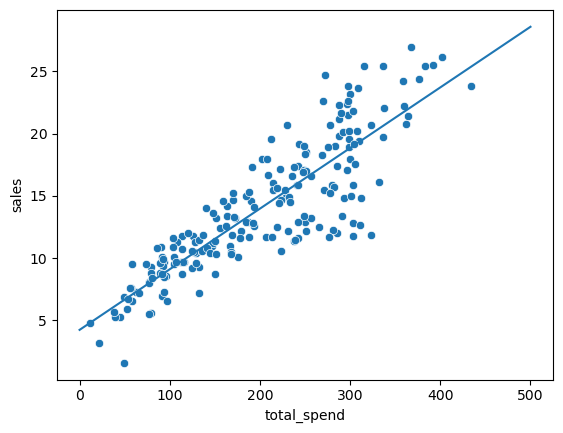

In [33]:
plt.plot(potential_spend, predicted_sales)
sns.scatterplot(x= "total_spend", y= "sales", data= df);

In Simple Linear Regression, we can improve the prediction model by increasing the polynomial degree to improve the prediction value. However, since there is only one independent variable in this model, this is not very useful. For this reason, multiple linear regression or different prediction models are used.